# Grover's Search Algorithm

**Name : Mohamed Saad \\
ID     : 201801139**

The Grover's Search algorithm is a quantum algorithm for searching an unsorted database with N entries in $O(\sqrt{N})$ time. Classically, it would take O(N) time where we would need to search all entries in order to find the desired one. While this is only a quadratic speedup, it is quite significant when $N$ is large. 

Unlike many other quantum algorithms that solve a 'blackbox' problem, the Grover's Search Algorithm solves a searching problem wherein the purpose is the locate on particular state with a measurement, out of $2^N$ possible states. While it's described as a 'searching' algorithm, a more accurate description would be 'inverting' a function. Essentially, given function $y=f(x)$, the algorithm allows us to calculate $x$ (input into database) when given $y$ (output of database). 

#### Use Cases for Grover's Algorithm
1. Estimating the mean and media of a set of numbers
2. Solving the collision problem 
3. Solving NP complete problems
4. May have interesting applications in DNA Structure 

Below, I'll implement the Grover's Search algorithm on 3, and 4 qubits. In quantum computing (unlike classical computing), the number of possible states is $2^N$ so 2 qubits = 4 states, 3 qubits = 8 states, and 4 qubits = 16 states.

### Algorithm overview

Given an unsorted list of $N$ elements, Grover's algorithm allows us to find a *target element* (in our case, a state) with $O(\sqrt N)$ operations or iterations. The reason why Grover's algorithm works so well (at least in theory) is because of its amplitude amplification, meaning it will single out the desired element without us having to search all the elements of the list.

#### Our Problem
We need to find the index of the target state among a list of $N=2^n$ elements, such that $n$ is the number of qubits and $N$ is the total size of the list. Here are the steps we need to implement to apply Grover's algorithm:

1. Prepare the qubits by putting them in uniform superposition, $|s\rangle$ by applying $H^{ \bigotimes n }|0 \rangle$.
2. Apply the Oracle $O$ to mark the target element by negating its sign such hat $O|x\rangle = -|x\rangle$.
3. Apply the Grover diffusion operator $D$ to amplify the probability amplitude of the target element.
4. Repeat steps 2-3 for about $\sqrt N$ times and then perform measurements to find the target element.  

Specifically, Grover's diffusion operator can be expressed as $2|\Psi \rangle \langle\Psi| - I_{N} = H^{ \bigotimes n }(2|0 \rangle \langle 0| - I_{N})H^{ \bigotimes n }$ (*Nielson and Chuang*)**.** $|\Psi \rangle$ is the uniform superposition of all the states and $I_{N}$ is the $N$ identity matrix. $2|\Psi \rangle \langle\Psi|$ operates a reflection about $|\Psi\rangle$ and $2|0 \rangle \langle 0| - I_{N}$ operatres a reflection about $|0\rangle$

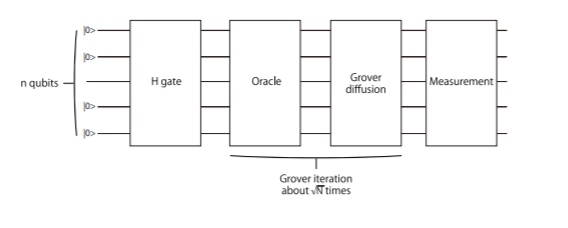   

<left>Visual representation of circuit for Grover's Algorithm <left>  
<br/>




## Implementation of Grover's Search for 3 qubits



In [ ]:
!pip install qiskit[visualization]


In [54]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor  
from math import pi

In [29]:
# Initializing
nb_qubit = 3 #number of qubit
qmc = QuantumCircuit(nb_qubit) # initializing quantum circuit with three qubits, state here |000⟩ .

### 1- Superposition of the States




In [53]:
# This is done by applying H-gate for every qubit
for i in range(0,nb_qubit,1):
    qmc.h(i)
# after this process the state would be |Ψ⟩ = (1/sqrt(8))(|000⟩ + |001⟩ + |010⟩ + |100⟩ +|110⟩ + |101⟩ +|011⟩ + |111⟩)

Our problem is to identify number 6, which is the state |110⟩, so we now need an oracle that flip the sign of the amplitude  of this state.

### 2- Oracle

In [23]:
def oracle_110(a):
  a.x(0)
  a.h(2)
  a.ccx(0,1,2)
  a.h(2)
  a.x(0)


In [31]:
# Applying this to our circuit would flip the sign of |110⟩,
oracle_110(qmc)
#|Ψ⟩ = (1/sqrt(8))(|000⟩ + |001⟩ + |010⟩ + |100⟩ -|110⟩ + |101⟩ +|011⟩ + |111⟩)

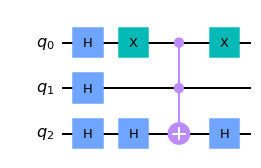

In [34]:
qmc.draw(output='mpl')

### 3- Refelection

At this process, we perform a refelection about the new mean, after fliping the sign of our state. 

In [38]:
def Reflection(b):
  for i in range(0,3,1):
      b.h(i)
      b.x(i)

  # Do controlled-Z
  b.h(2)
  b.ccx(0,1,2)
  b.h(2)

  for i in range(0,3,1):
    b.x(i)
    b.h(i)

In [39]:
# Applying this to our circuit:
Reflection(qmc)

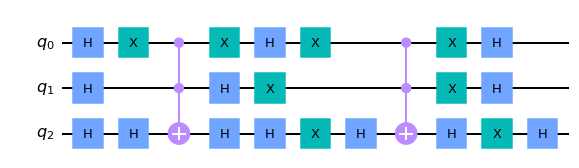

In [40]:
qmc.draw(output='mpl')

If we examined the state now, we would have:
$ |Ψ⟩ = (-0.18 |000⟩ -0.18 |001⟩ -0.18 |010⟩ -0.18 |100⟩ -0.88 |110⟩ -0.18 |101⟩ -0.18 |011⟩ -0.18 |111⟩) $

Even, the amplitude of state |110⟩ is high, it can be amplified again be repeating the process again.

### 4- Repeating process


In [43]:
oracle_110(qmc) # |Ψ⟩ = (-0.18 |000⟩ -0.18 |001⟩ -0.18 |010⟩ -0.18 |100⟩ + 0.88 |110⟩ -0.18 |101⟩ -0.18 |011⟩ -0.18 |111⟩) 
Refelection(qmc) # |Ψ⟩ = (- 0.08 |000⟩ - 0.08 |001⟩ - 0.08 |010⟩ - 0.08 |100⟩ + 0.97 |110⟩ - 0.08 |101⟩ - 0.08 |011⟩ - 0.08 |111⟩) 

Final state: $$|Ψ⟩ = (- 0.08 |000⟩ - 0.08 |001⟩ - 0.08 |010⟩ - 0.08 |100⟩ + 0.97 |110⟩ - 0.08 |101⟩ - 0.08 |011⟩ - 0.08 |111⟩) $$

We can see the amplitude of our state is very high. However, if we repeat the process a third time, as one might think, the amplitudes would change to 
$$|Ψ⟩ = (0.3 |000⟩ + 0.3 |001⟩ + 0.3 |010⟩ + 0.3 |100⟩ - 0.57 |110⟩ + 0.3 |101⟩ + 0.3 |011⟩ + 0.3 |111⟩)$$

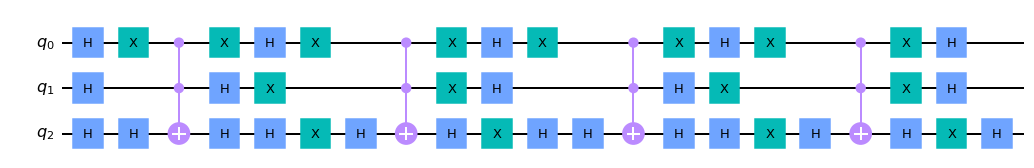

In [45]:
qmc.draw(output='mpl')

### 5- Measurement

we will now run this curcuit many times, and each time would would measure the outcome and hence the probability of getting the desired state.


In [46]:
qmc.measure_all()

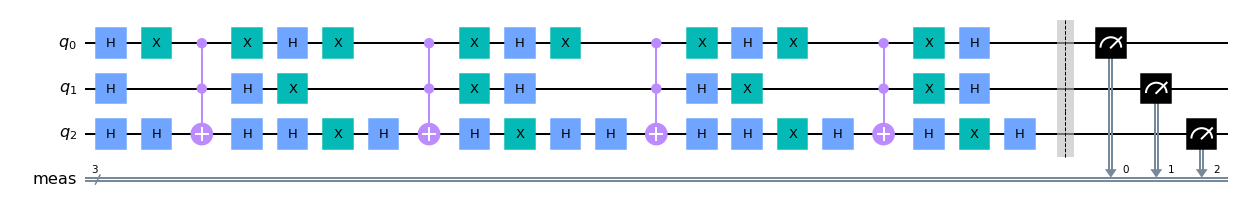

In [48]:
qmc.draw(output='mpl')

Job Status: job has successfully run
RESULT:  {'000': 7892, '001': 7976, '010': 7723, '011': 7817, '100': 7844, '101': 7777, '110': 945137, '111': 7834} 



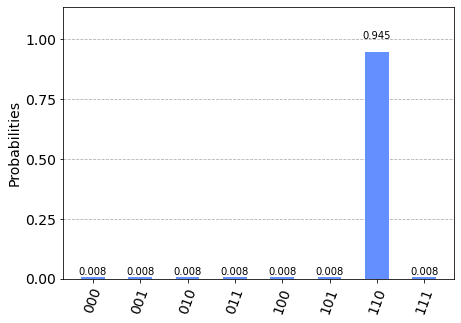

In [52]:
# Running the circuit in ideal environment
simulator = Aer.get_backend('qasm_simulator') 
shots = 1000000
job = execute(qmc, backend=simulator, shots=shots) 
job_monitor(job)
counts = job.result().get_counts()

print('RESULT: ',counts,'\n')
plot_histogram(counts)

we can see the amplitudes are almost the same as above, if we increased the number of shots more and more we would get the exact values.

### 6- Final Comment


We have seen Grover's Algorithm successfully identified the desired state in only **Two** iterations. The Number of iterations in general can be calculated using the floor of the  following form $$\frac{\pi }{4} \sqrt{N}$$. In our problem $N=2^{3}=8$, that floor of  $\frac{\pi }{4} \sqrt{8} = 2 $ , which is consistent with our findings.

For the classical case: the average number of iterations would be $$\frac{N}{2}$$, for $N=8$ , number of iterations $= 4 $.

So, for this 3 qubit case, Grover's Algorithm saved $2$ iterations. As the number of qubits increase, Grover's Algorithm would save more and more iterations. 

<center>

#  4 Qubit Generalization 



In [55]:
# Initializing
n_qubit = 4 #number of qubit
qucircuit = QuantumCircuit(n_qubit) # initializing quantum circuit with three qubits, state here |000⟩ .

### 1- Superposition of the States

In [56]:
for i in range(0,n_qubit,1):
    qucircuit.h(i)

### 2- General oracle for 4 qubits

In [59]:
def oracle(target,qc):
  if target == "0000":
    qc.x(0)
    qc.x(1)
    qc.x(2)
    qc.x(3)

    qc.cu1(pi/4, 0, 3)
    qc.cx(0, 1)
    qc.cu1(-pi/4, 1, 3)
    qc.cx(0, 1)
    qc.cu1(pi/4, 1, 3)
    qc.cx(1, 2)
    qc.cu1(-pi/4, 2, 3)
    qc.cx(0, 2)
    qc.cu1(pi/4, 2, 3)
    qc.cx(1, 2)
    qc.cu1(-pi/4, 2, 3)
    qc.cx(0, 2)
    qc.cu1(pi/4, 2, 3)

    qc.x(0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
  elif target =="0001 ":
    qc.x(1)
    qc.x(2)
    qc.x(3)

    qc.cu1(pi/4, 0, 3)
    qc.cx(0, 1)
    qc.cu1(-pi/4, 1, 3)
    qc.cx(0, 1)
    qc.cu1(pi/4, 1, 3)
    qc.cx(1, 2)
    qc.cu1(-pi/4, 2, 3)
    qc.cx(0, 2)
    qc.cu1(pi/4, 2, 3)
    qc.cx(1, 2)
    qc.cu1(-pi/4, 2, 3)
    qc.cx(0, 2)
    qc.cu1(pi/4, 2, 3)

    qc.x(1)
    qc.x(2)
    qc.x(3)
    
  elif target == "0010":
      qc.x(0)
      qc.x(2)
      qc.x(3)

      qc.cu1(pi/4, 0, 3)
      qc.cx(0, 1)
      qc.cu1(-pi/4, 1, 3)
      qc.cx(0, 1)
      qc.cu1(pi/4, 1, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)

      qc.x(0)
      qc.x(2)
      qc.x(3)
  elif target== "0011":
      qc.x(2)
      qc.x(3)

      qc.cu1(pi/4, 0, 3)
      qc.cx(0, 1)
      qc.cu1(-pi/4, 1, 3)
      qc.cx(0, 1)
      qc.cu1(pi/4, 1, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)

      qc.x(2)
      qc.x(3)
  elif target== "0100":
      qc.x(0)
      qc.x(1)
      qc.x(3)

      qc.cu1(pi/4, 0, 3)
      qc.cx(0, 1)
      qc.cu1(-pi/4, 1, 3)
      qc.cx(0, 1)
      qc.cu1(pi/4, 1, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)

      qc.x(0)
      qc.x(1)
      qc.x(3)
  elif target== "0101":
      qc.x(1)
      qc.x(3)

      qc.cu1(pi/4, 0, 3)
      qc.cx(0, 1)
      qc.cu1(-pi/4, 1, 3)
      qc.cx(0, 1)
      qc.cu1(pi/4, 1, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)

      qc.x(1)
      qc.x(3)
  elif target=="0110":

      qc.x(0)
      qc.x(3)

      qc.cu1(pi/4, 0, 3)
      qc.cx(0, 1)
      qc.cu1(-pi/4, 1, 3)
      qc.cx(0, 1)
      qc.cu1(pi/4, 1, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)

      qc.x(0)
      qc.x(3)
  elif target== "0111":

      qc.x(3)

      qc.cu1(pi/4, 0, 3)
      qc.cx(0, 1)
      qc.cu1(-pi/4, 1, 3)
      qc.cx(0, 1)
      qc.cu1(pi/4, 1, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)

      qc.x(3)
      
  elif target== "1000":

      qc.x(0)
      qc.x(1)
      qc.x(2)

      qc.cu1(pi/4, 0, 3)
      qc.cx(0, 1)
      qc.cu1(-pi/4, 1, 3)
      qc.cx(0, 1)
      qc.cu1(pi/4, 1, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)

      qc.x(0)
      qc.x(1)
      qc.x(2)
  elif target== "1001":

      qc.x(1)
      qc.x(2)

      qc.cu1(pi/4, 0, 3)
      qc.cx(0, 1)
      qc.cu1(-pi/4, 1, 3)
      qc.cx(0, 1)
      qc.cu1(pi/4, 1, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)

      qc.x(1)
      qc.x(2)
  elif target== "1010":

      qc.x(0)
      qc.x(2)

      qc.cu1(pi/4, 0, 3)
      qc.cx(0, 1)
      qc.cu1(-pi/4, 1, 3)
      qc.cx(0, 1)
      qc.cu1(pi/4, 1, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)

      qc.x(0)
      qc.x(2)
  elif target== "1011":
      qc.x(3)

      qc.cu1(pi/4, 0, 3)
      qc.cx(0, 1)
      qc.cu1(-pi/4, 1, 3)
      qc.cx(0, 1)
      qc.cu1(pi/4, 1, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)

      qc.x(3)
  elif target=="1100":

      qc.x(0)
      qc.x(1)

      qc.cu1(pi/4, 0, 3)
      qc.cx(0, 1)
      qc.cu1(-pi/4, 1, 3)
      qc.cx(0, 1)
      qc.cu1(pi/4, 1, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)

      qc.x(0)
      qc.x(1)
  elif target== "1101":

      qc.x(1)

      qc.cu1(pi/4, 0, 3)
      qc.cx(0, 1)
      qc.cu1(-pi/4, 1, 3)
      qc.cx(0, 1)
      qc.cu1(pi/4, 1, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)

      qc.x(1)
  elif target== "1110":

      qc.x(0)

      qc.cu1(pi/4, 0, 3)
      qc.cx(0, 1)
      qc.cu1(-pi/4, 1, 3)
      qc.cx(0, 1)
      qc.cu1(pi/4, 1, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)

      qc.x(0)
  elif target== "1111":

      qc.cu1(pi/4, 0, 3)
      qc.cx(0, 1)
      qc.cu1(-pi/4, 1, 3)
      qc.cx(0, 1)
      qc.cu1(pi/4, 1, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)
      qc.cx(1, 2)
      qc.cu1(-pi/4, 2, 3)
      qc.cx(0, 2)
      qc.cu1(pi/4, 2, 3)


### 3- Reflection

In [58]:
def reflection(qc):
  qc.h(0)
  qc.h(1)
  qc.h(2)
  qc.h(3)
  qc.x(0)
  qc.x(1)
  qc.x(2)
  qc.x(3)

  qc.cu1(pi/4, 0, 3)
  qc.cx(0, 1)
  qc.cu1(-pi/4, 1, 3)
  qc.cx(0, 1)
  qc.cu1(pi/4, 1, 3)
  qc.cx(1, 2)
  qc.cu1(-pi/4, 2, 3)
  qc.cx(0, 2)
  qc.cu1(pi/4, 2, 3)
  qc.cx(1, 2)

  qc.cu1(-pi/4, 2, 3)
  qc.cx(0, 2)
  qc.cu1(pi/4, 2, 3)

  qc.x(0)
  qc.x(1)
  qc.x(2)
  qc.x(3)
  qc.h(0)
  qc.h(1)
  qc.h(2)
  qc.h(3)

### 4- Applying process

Since we have $4$ qubits, the number of iterations would be $\frac{\pi }{4} \sqrt{16}$ $= 3$ iterations. That we would apply oracle + reflection 3 times. 
I would work on target = "1111"

**1st iteration** 

In [61]:
oracle("1111",qucircuit)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:318: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.


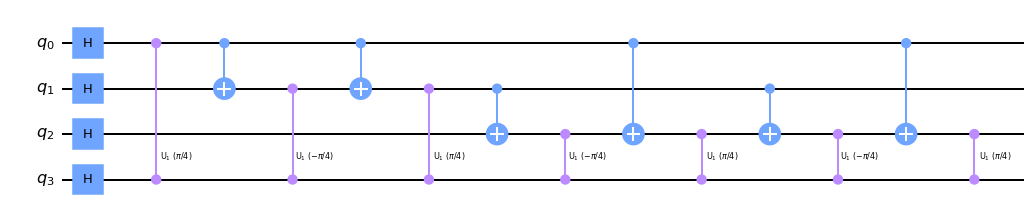

In [62]:
qucircuit.draw(output='mpl')

We can check if the amplitude of the target changed of not, using statevector_simulator.

In [63]:
S_simulator = Aer.get_backend('statevector_simulator')

## now to execute the circuit, using the execute function and after it runs we can store the results using "result" fucntion
rslt = execute(qucircuit, backend = S_simulator).result()
## extract the statevector from all the different result options using the "get_statevector" function
My_statevector = rslt.get_statevector()
print(My_statevector) 

[ 0.25+0.00000000e+00j  0.25+0.00000000e+00j  0.25+0.00000000e+00j
  0.25+0.00000000e+00j  0.25+0.00000000e+00j  0.25+0.00000000e+00j
  0.25+0.00000000e+00j  0.25+0.00000000e+00j  0.25+0.00000000e+00j
  0.25+0.00000000e+00j  0.25+0.00000000e+00j  0.25+0.00000000e+00j
  0.25+0.00000000e+00j  0.25+0.00000000e+00j  0.25+0.00000000e+00j
 -0.25+8.32667268e-17j]


*Nice it worked.* Now applying **reflection** operator.

In [64]:
reflection(qucircuit)

In [ ]:
qucircuit.draw(output='mpl')

Checking the amplitude of "1111" , can be enhanced more still

In [66]:
S_simulator = Aer.get_backend('statevector_simulator')

## now to execute the circuit, using the execute function and after it runs we can store the results using "result" fucntion
rslt = execute(qucircuit, backend = S_simulator).result()
## extract the statevector from all the different result options using the "get_statevector" function
My_statevector = rslt.get_statevector()
print(My_statevector)

[-0.1875+1.65460594e-16j -0.1875+1.40330280e-16j -0.1875+1.34213105e-16j
 -0.1875+1.00971673e-16j -0.1875+1.42711332e-16j -0.1875+1.07066381e-16j
 -0.1875+1.04569883e-16j -0.1875+3.01976440e-17j -0.1875+1.34844424e-16j
 -0.1875+1.20242337e-16j -0.1875+1.03596935e-16j -0.1875+5.98272763e-17j
 -0.1875+1.12095162e-16j -0.1875+2.09390603e-17j -0.1875+4.61981370e-17j
 -0.6875+4.75137222e-16j]


**2nd iteration** 

In [67]:
oracle("1111", qucircuit)
reflection(qucircuit)

In [68]:
S_simulator = Aer.get_backend('statevector_simulator')

## now to execute the circuit, using the execute function and after it runs we can store the results using "result" fucntion
rslt = execute(qucircuit, backend = S_simulator).result()
## extract the statevector from all the different result options using the "get_statevector" function
My_statevector = rslt.get_statevector()
print(My_statevector)

[0.078125+2.92532095e-18j 0.078125-8.83094865e-19j
 0.078125-2.80234412e-17j 0.078125+2.73300497e-18j
 0.078125-2.07557007e-17j 0.078125-3.07610067e-17j
 0.078125-1.40206445e-17j 0.078125+3.35010390e-17j
 0.078125-4.72872154e-18j 0.078125-1.94152389e-17j
 0.078125-2.82521158e-17j 0.078125+5.27651784e-17j
 0.078125-6.07076255e-17j 0.078125+5.10593404e-17j
 0.078125-4.07261010e-17j 0.953125-1.42126685e-15j]


**3rd iteration** 

In [69]:
oracle("1111", qucircuit)
reflection(qucircuit)

In [70]:
S_simulator = Aer.get_backend('statevector_simulator')

## now to execute the circuit, using the execute function and after it runs we can store the results using "result" fucntion
rslt = execute(qucircuit, backend = S_simulator).result()
## extract the statevector from all the different result options using the "get_statevector" function
My_statevector = rslt.get_statevector()
print(My_statevector)

[ 0.05078125-2.07943897e-16j  0.05078125-2.33844799e-16j
  0.05078125-2.62769758e-16j  0.05078125-2.35797420e-16j
  0.05078125-2.47006376e-16j  0.05078125-2.81198499e-16j
  0.05078125-2.56190414e-16j  0.05078125-2.77693020e-16j
  0.05078125-2.25165493e-16j  0.05078125-2.67718596e-16j
  0.05078125-2.72069445e-16j  0.05078125-2.66673859e-16j
  0.05078125-2.77451592e-16j  0.05078125-2.99705555e-16j
  0.05078125-4.02460135e-16j -0.98046875+2.22345423e-15j]


We can see the amplitude after the third iteration is very high. if we apply the process agai the amplitude would drop. 

### 5- Measurement

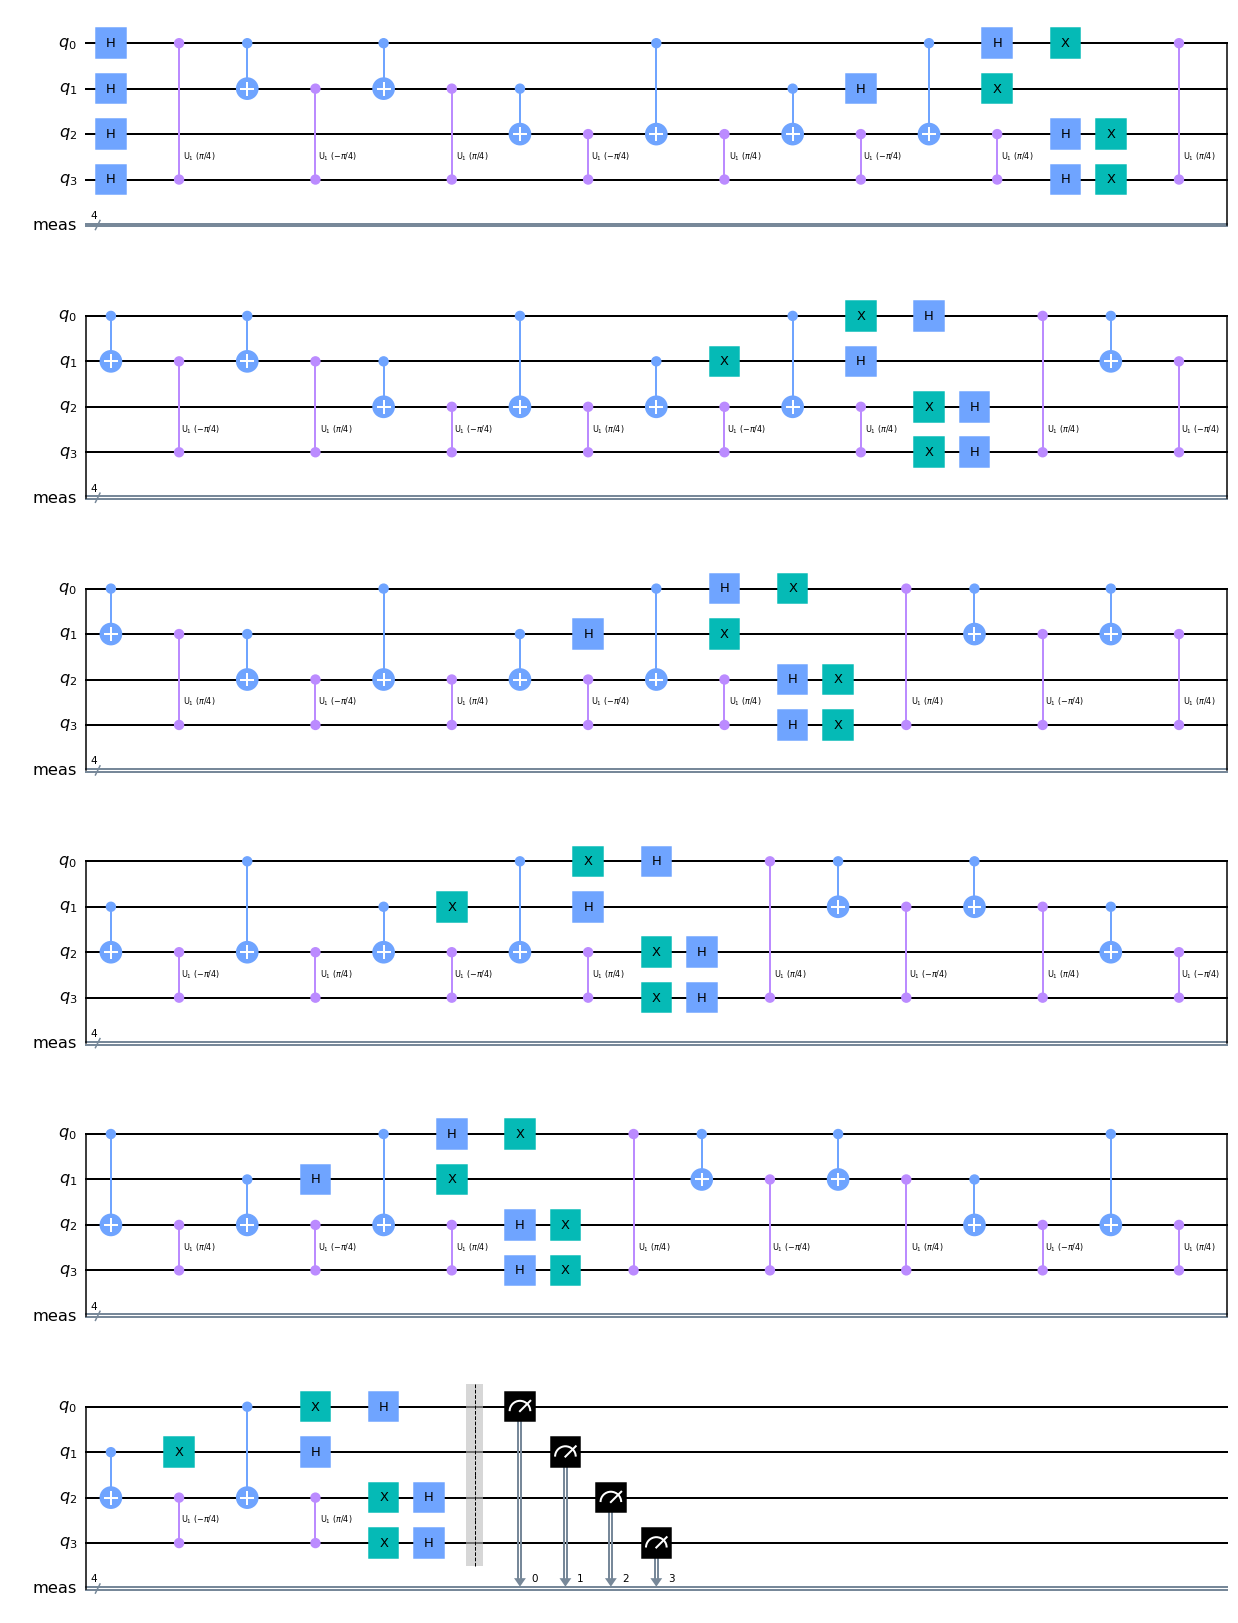

In [71]:
qucircuit.measure_all()
qucircuit.draw(output='mpl')

Job Status: job has successfully run
RESULT:  {'0000': 2525, '0001': 2506, '0010': 2613, '0011': 2530, '0100': 2560, '0101': 2583, '0110': 2647, '0111': 2531, '1000': 2564, '1001': 2533, '1010': 2583, '1011': 2644, '1100': 2595, '1101': 2621, '1110': 2539, '1111': 961426} 



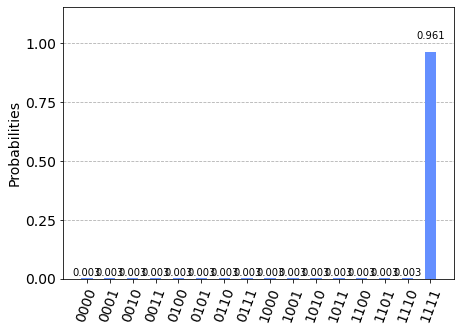

In [72]:
# Running the circuit in ideal environment
simulator = Aer.get_backend('qasm_simulator') 
shots = 1000000
job = execute(qucircuit, backend=simulator, shots=shots) 
job_monitor(job)
counts = job.result().get_counts()

print('RESULT: ',counts,'\n')
plot_histogram(counts)

So, successfully we identified our tarket in 3 iterations only. Classically we would need on average 8 iterations.